In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""---------------------------------------------------------------------------
AMSR Ocean Algorithm; Frank J. Wentz, Thomas Meissner; Remote
Sensing Systems; Version 2; November 2; 2000. Modified to NIMBUS 6 SCAMS geometry.
NIMBUS 6 SCAMS Scanning Microwave Spectrometer 145 km spatial resolution 2400 km swath
Tb=scams(V,W,L,Ta,Ts,theta,Ti_amsrv,Ti_amsrh,c_ice,e_icev,e_iceh)
V: columnar water vapor [mm]
W: windspeed over water [m/s]
L: columnar cloud liquid water [mm]
Ts: sea surface temperature [K]
theta: incidence angle [deg]
Ti: ice surface temperature [K]
c_ice: ice concentration [0-1]  #0 åbent vand, 1 er is  (Array)
e_ice: ice emissivity [0-1]  #0.8 eller 0.9 til at starte med (Array)
-------------------------------------------------------------------------------"""
import sys, os, string, math, cmath
import numpy as np

def scams(V,W,L,Ta,Ts,theta,Ti_amsrv,Ti_amsrh,c_ice,e_icev,e_iceh):

    frequencies=np.array([6.93, 10.65, 18.70, 23.80, 36.50, 50.30, 52.80, 89.00])

    b0=np.array([239.50E+0,  239.51E+0,  240.24E+0,  241.69E+0,  239.45E+0,  242.10E+0,  245.87E+0,  242.58E+0])
    b1=np.array([213.92E-2,  225.19E-2,  298.88E-2,  310.32E-2,  254.41E-2,  229.17E-2,  250.61E-2,  302.33E-2])
    b2=np.array([-460.60E-4, -446.86E-4, -725.93E-4, -814.29E-4, -512.84E-4, -508.05E-4, -627.89E-4, -749.76E-4])
    b3=np.array([457.11E-6,  391.82E-6,  814.50E-6,  998.93E-6,  452.02E-6,  536.90E-6,  759.62E-6,  880.66E-6])
    b4=np.array([-16.84E-7,  -12.20E-7,  -36.07E-7,  -48.37E-7,  -14.36E-7,  -22.07E-7,  -36.06E-7,  -40.88E-7])
    b5=np.array([0.50E+0,     0.54E+0,    0.61E+0,    0.20E+0,    0.58E+0,    0.52E+0,    0.53E+0,    0.62E+0])
    b6=np.array([-0.11E+0,   -0.12E+0,   -0.16E+0,   -0.20E+0,   -0.57E+0,   -4.59E+0,  -12.52E+0,   -0.57E+0])
    b7=np.array([-0.21E-2,   -0.34E-2,   -1.69E-2,   -5.21E-2,   -2.38E-2,   -8.78E-2,  -23.26E-2,   -8.07E-2])
    ao1=np.array([8.34E-3,    9.08E-3,   12.15E-3,   15.75E-3,   40.06E-3,  353.72E-3, 1131.76E-3,   53.35E-3])
    ao2=np.array([-0.48E-4,  -0.47E-4,   -0.61E-4,   -0.87E-4,   -2.00E-4,  -13.79E-4,   -2.26E-4,   -1.18E-4])
    av1=np.array([0.07E-3,    0.18E-3,    1.73E-3,    5.14E-3,    1.88E-3,    2.91E-3,    3.17E-3,    8.78E-3])
    av2=np.array([0.00E-5,    0.00E-5,   -0.05E-5,    0.19E-5,    0.09E-5,    0.24E-5,    0.27E-5,    0.80E-5])

    aL1=np.array([0.0078, 0.0183, 0.0556, 0.0891,  0.2027,  0.3682,  0.4021,  0.9693])
    aL2=np.array([0.0303, 0.0298, 0.0288, 0.0281,  0.0261,  0.0236,  0.0231,  0.0146])
    aL3=np.array([0.0007, 0.0027, 0.0113, 0.0188,  0.0425,  0.0731,  0.0786,  0.1506])
    aL4=np.array([0.0000, 0.0060, 0.0040, 0.0020, -0.0020, -0.0020, -0.0020, -0.0020])
    aL5=np.array([1.2216, 1.1795, 1.0636, 1.0220,  0.9546,  0.8983,  0.8943,  0.7961])

    r0v=np.array([-0.27E-3,  -0.32E-3,  -0.49E-3,  -0.63E-3,  -1.01E-3, -1.20E-3, -1.23E-03, -1.53E-3])
    r0h=np.array([0.54E-3,   0.72E-3,   1.13E-3,   1.39E-3,   1.91E-3,  1.97E-3,  1.97E-03,  2.02E-3])
    r1v=np.array([-0.21E-4,  -0.29E-4,  -0.53E-4,  -0.70E-4,  -1.05E-4, -1.12E-4, -1.13E-04, -1.16E-4])
    r1h=np.array([0.32E-4,   0.44E-4,   0.70E-4,   0.85E-4,   1.12E-4,  1.18E-4,  1.19E-04,  1.30E-4])
    r2v=np.array([-2.10E-5,  -2.10E-5,  -2.10E-5,  -2.10E-5,  -2.10E-5, -2.10E-5, -2.10E-05, -2.10E-5])
    r2h=np.array([-25.26E-6, -28.94E-6, -36.90E-6, -41.95E-6, -54.51E-6, -5.50E-5, -5.50E-5,  -5.50E-5])
    r3v=np.array([0.00E-6,   0.08E-6,   0.31E-6,   0.41E-6,   0.45E-6,  0.35E-6,  0.32E-06, -0.09E-6])
    r3h=np.array([0.00E-6,  -0.02E-6,  -0.12E-6,  -0.20E-6,  -0.36E-6, -0.43E-6, -0.44E-06, -0.46E-6])

    m1v=np.array([0.00020, 0.00020, 0.00140, 0.00178, 0.00257, 0.00260, 0.00260, 0.00260])
    m1h=np.array([0.00200, 0.00200, 0.00293, 0.00308, 0.00329, 0.00330, 0.00330, 0.00330])
    m2v=np.array([0.00690, 0.00690, 0.00736, 0.00730, 0.00701, 0.00700, 0.00700, 0.00700])
    m2h=np.array([0.00600, 0.00600, 0.00656, 0.00660, 0.00660, 0.00660, 0.00660, 0.00660])

    TD=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    TU=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    AO=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    AV=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    AL=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    tau=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    TBU=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    TBD=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    llambda=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    epsilon=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], dtype=np.complex128)
    rho_H=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], dtype=np.complex128)
    rho_V=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], dtype=np.complex128)
    R_0H=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    R_0V=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    R_geoH=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    R_geoV=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    F_H=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    F_V=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    R_H=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    R_V=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    OmegaH=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    OmegaV=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    T_BOmegaH=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    T_BOmegaV=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    emissivityh=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    emissivityv=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    term=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    Delta_S2=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    Tv=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    Th=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

    T_C=2.7

    if c_ice < 0.0: c_ice=0.0
    if c_ice > 1.0: c_ice=1.0

    Ts_mix=c_ice*Ta+(1.0-c_ice)*Ts

    Tl=(Ts_mix+273.0)/2.0

    #eq 27
    Tv=273.16+0.8337*V-3.029E-5*(V**3.33)
    if V > 48:  Tv=301.16
    G = 1.05*(Ts_mix-Tv)*(1-((Ts_mix-Tv)**2)/1200.0)
    if math.fabs(Ts_mix-Tv) > 20: G = (Ts_mix-Tv)*14/math.fabs(Ts_mix-Tv)

    epsilon_R=4.44 # this value is from wentz and meisner, 2000, p. 28
    s=35.0
    ny=0.012 # Klein and Swift is using 0.02 which is giving a higher epsilon_R (4.9)
    light_speed=3.00E10
    free_space_permittivity=8.854E-12
    #eq 43
    epsilon_S = (87.90*math.exp(-0.004585*(Ts-273.15)))*(math.exp(-3.45E-3*s+4.69E-6*s**2+1.36E-5*s*(Ts-273.15)))
    #eq 44
    lambda_R = (3.30*math.exp(-0.0346*(Ts-273.15)+0.00017*(Ts-273.15)**2))-(6.54E-3*(1-3.06E-2*(Ts-273.15)+2.0E-4*(Ts-273.15)**2)*s)
    #eq 41
    C=0.5536*s
    #eq 42
    delta_t=25.0-(Ts-273.15)
    #eq 40
    qsi=2.03E-2+1.27E-4*delta_t+2.46E-6*delta_t**2-C*(3.34E-5-4.60E-7*delta_t+4.60E-8*delta_t**2)
    #eq 39
    sigma=3.39E9*(C**0.892)*math.exp(-delta_t*qsi)

    for i in range(0,8):
        #eq26
        TD[i]=b0[i]+b1[i]*V+b2[i]*V**2+b3[i]*V**3+b4[i]*V**4+b5[i]*G
        TU[i]=TD[i]+b6[i]+b7[i]*V
        #eq 28
        AO[i]=ao1[i]+ao2[i]*(TD[i]-270.0)
        #eq 29
        AV[i]=av1[i]*V+av2[i]*V**2
        #eq 33
        AL[i]=aL1[i]*(1.0-aL2[i]*(Tl-283.0))*L
        #eq 22
        tau[i]=math.exp((-1.0/math.cos(math.radians(theta)))*(AO[i]+AV[i]+AL[i])) 
        #eq 24
        TBU[i]=TU[i]*(1.0-tau[i])
        TBD[i]=TD[i]*(1.0-tau[i])

        llambda[i]=(light_speed/(frequencies[i]*1E9))

        #eq 35
        epsilon[i]=epsilon_R+((epsilon_S-epsilon_R)/(1.0+((cmath.sqrt(-1)*lambda_R)/llambda[i])**(1.0-ny)))-((2.0*cmath.sqrt(-1)*sigma*llambda[i])/light_speed)
        #eq.45
        rho_H[i]=(math.cos(math.radians(theta))-cmath.sqrt(epsilon[i]-math.sin(math.radians(theta))**2))/\
                 (math.cos(math.radians(theta))+cmath.sqrt(epsilon[i]-math.sin(math.radians(theta))**2))
        rho_V[i]=(epsilon[i]*math.cos(math.radians(theta))-cmath.sqrt(epsilon[i]-math.sin(math.radians(theta))**2))/\
                 (epsilon[i]*math.cos(math.radians(theta))+cmath.sqrt(epsilon[i]-math.sin(math.radians(theta))**2))
        #eq46
        R_0H[i]=np.absolute(rho_H[i])**2
        R_0V[i]=np.absolute(rho_V[i])**2+(4.887E-8-6.108E-8*(Ts-273.0)**3)

        #eq 57
        R_geoH[i]=R_0H[i]-(r0h[i]+r1h[i]*(theta-53.0)+r2h[i]*(Ts-288.0)+r3h[i]*(theta-53.0)*(Ts-288.0))*W
        R_geoV[i]=R_0V[i]-(r0v[i]+r1v[i]*(theta-53.0)+r2v[i]*(Ts-288.0)+r3v[i]*(theta-53.0)*(Ts-288.0))*W
        #eq.60
        W_1=7.0
        W_2=12.0
        if W<W_1: F_H[i]=m1h[i]*W
        elif W_1<W<W_2: F_H[i]=m1h[i]*W+0.5*(m2h[i]-m1h[i])*((W-W_1)**2)/(W_2-W_1)
        else: F_H[i]=m2h[i]*W-0.5*(m2h[i]-m1h[i])*(W_2+W_1)
        W_1=3.0
        W_2=12.0
        if W<W_1: F_V[i]=m1v[i]*W
        elif W_1<W<W_2: F_V[i]=m1v[i]*W+0.5*(m2v[i]-m1v[i])*((W-W_1)**2)/(W_2-W_1)
        else: F_V[i]=m2v[i]*W-0.5*(m2v[i]-m1v[i])*(W_2+W_1)

        R_H[i]=(1-F_H[i])*R_geoH[i]
        R_V[i]=(1-F_V[i])*R_geoV[i]

        emissivityh[i]=1-R_H[i]
        emissivityv[i]=1-R_V[i]

        if i >= 4: Delta_S2[i]=5.22E-3*W
        else: Delta_S2[i]=5.22E-3*(1-0.00748*(37.0-frequencies[i])**1.3)*W
        if Delta_S2[i]>0.069: Delta_S2[i]=0.069
        #eq.62
        term[i]=Delta_S2[i]-70.0*Delta_S2[i]**3
        OmegaH[i]=(6.2-0.001*(37.0-frequencies[i])**2)*term[i]*tau[i]**2.0
        OmegaV[i]=(2.5+0.018*(37.0-frequencies[i]))*term[i]*tau[i]**3.4
        #eq.61
        T_BOmegaH[i]=((1+OmegaH[i])*(1-tau[i])*(TD[i]-T_C)+T_C)*R_H[i] 
        T_BOmegaV[i]=((1+OmegaV[i])*(1-tau[i])*(TD[i]-T_C)+T_C)*R_V[i]
        
        
        Th22=TBU[3]+tau[3]*((1.0 - c_ice)*emissivityh[3]*Ts+c_ice*e_iceh[3]*Ti_amsrh[3]+(1.0 - c_ice)*(1.0 - emissivityh[3])*\
             (T_BOmegaH[3]+tau[3]*T_C)+c_ice*(1.0 - e_iceh[3])*(TBD[3]+tau[3]*T_C))

        Tv22=TBU[3]+tau[3]*((1.0 - c_ice)*emissivityv[3]*Ts+c_ice*e_icev[3]*Ti_amsrv[3]+(1.0 - c_ice)*(1.0 - emissivityv[3])*\
             (T_BOmegaV[3]+tau[3]*T_C)+c_ice*(1.0 - e_icev[3])*(TBD[3]+tau[3]*T_C))
        
        T22=Tv22*(math.sin(math.radians(theta)))**2 + Th22*(math.cos(math.radians(theta)))**2
        
        Th31=TBU[4]+tau[4]*((1.0 - c_ice)*emissivityh[4]*Ts+c_ice*e_iceh[4]*Ti_amsrh[4]+(1.0 - c_ice)*(1.0 - emissivityh[4])*\
             (T_BOmegaH[4]+tau[4]*T_C)+c_ice*(1.0 - e_iceh[4])*(TBD[4]+tau[4]*T_C))

        Tv31=TBU[4]+tau[4]*((1.0 - c_ice)*emissivityv[4]*Ts+c_ice*e_icev[4]*Ti_amsrv[4]+(1.0 - c_ice)*(1.0 - emissivityv[4])*\
             (T_BOmegaV[4]+tau[4]*T_C)+c_ice*(1.0 - e_icev[4])*(TBD[4]+tau[4]*T_C))
        
        T31=Tv31*(math.sin(math.radians(theta)))**2 + Th31*(math.cos(math.radians(theta)))**2
        
        Th52=TBU[6]+tau[6]*((1.0 - c_ice)*emissivityh[6]*Ts+c_ice*e_iceh[6]*Ti_amsrh[6]+(1.0 - c_ice)*(1.0 - emissivityh[6])*\
             (T_BOmegaH[6]+tau[6]*T_C)+c_ice*(1.0 - e_iceh[6])*(TBD[6]+tau[6]*T_C))

        Tv52=TBU[6]+tau[6]*((1.0 - c_ice)*emissivityv[6]*Ts+c_ice*e_icev[6]*Ti_amsrv[6]+(1.0 - c_ice)*(1.0 - emissivityv[6])*\
             (T_BOmegaV[6]+tau[6]*T_C)+c_ice*(1.0 - e_icev[6])*(TBD[6]+tau[6]*T_C))
        
        T52=Tv52*(math.sin(math.radians(theta)))**2 + Th52*(math.cos(math.radians(theta)))**2
        
        #channel 1 on scams 22.231V, channel 2 31.650V, channel 3 52.863V
        Tb=np.array([T22,T31,T52])
    #return Tv, Th
    return Tb

# Load data

In [2]:
import numpy as np
import xarray as xr
from glob import glob

# Load data from the dataset
pattern = '/Users/emil/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/04 Semester/30110 Fagprojekt/Data/SCAMS_colocated/Nimbus6-SCAMS_*_era5.nc'
files = glob(pattern)

lat, lon, tbch1_measured, tbch2_measured, tbch3_measured, tbch4_measured, tbch5_measured = [], [], [], [], [], [], []
V, W, L, Ta, Ts, theta, Ti_amsrv, Ti_amsrh, c_ice = [], [], [], [], [], [], [], [], []
lattest = []

# Read and flatten data from each file
for file in files:
    ds = xr.open_dataset(file)

    # Latitude and longitude
    lat.append(ds["LAT"].values.flatten())  # Flatten to 1D
    lon.append(ds["LON"].values.flatten())
    lattest.append(ds["LAT"].values)

    # Brightness temperatures
    tbch1_measured.append(ds["TBCH1"].values.flatten())
    tbch2_measured.append(ds["TBCH2"].values.flatten())
    tbch3_measured.append(ds["TBCH3"].values.flatten())
    tbch4_measured.append(ds["TBCH4"].values.flatten())
    tbch5_measured.append(ds["TBCH5"].values.flatten())

    # Atmosphere and Surface Parameters
    V.append(ds["tcwv"].values.flatten())  # Water vapor
    u10 = ds["u10"].values.flatten() #Wind speed component
    v10 = ds["v10"].values.flatten() #Wind speed component
    W.append(np.sqrt(u10**2 + v10**2))  # Wind speed magnitude
    L.append(ds["tcw"].values.flatten())  # Cloud liquid water
    Ta.append(ds["t2m"].values.flatten())  # Air temperature at 2m
    Ts.append(ds["sst"].values.flatten())  # Sea surface temperature
    Ti_amsrv.append(ds["istl1"].values.flatten())  # Ice surface temperature
    Ti_amsrh.append(ds["istl1"].values.flatten())  # Same for horizontal polarization
    c_ice.append(ds["siconc"].values.flatten())  # Ice concentration

    #Incidence angle (Same acroos all coulomns)
    rows = ds["tcwv"].values.shape[0]
    INANG_expanded = np.tile(ds["INANG"].values, (rows, 1))
    theta.append(INANG_expanded.flatten())  # Incidence angle per scan position

In [3]:
# Convert lists to numpy arrays
lat, lon = np.concatenate(lat), np.concatenate(lon)
tbch1_measured, tbch2_measured, tbch3_measured = np.concatenate(tbch1_measured), np.concatenate(tbch2_measured), np.concatenate(tbch3_measured)
tbch4_measured, tbch5_measured = np.concatenate(tbch4_measured), np.concatenate(tbch5_measured)
V, W, L = np.concatenate(V), np.concatenate(W), np.concatenate(L)
Ta, Ts = np.concatenate(Ta), np.concatenate(Ts)
theta = np.concatenate(theta)
Ti_amsrv, Ti_amsrh = np.concatenate(Ti_amsrv), np.concatenate(Ti_amsrh)
c_ice = np.concatenate(c_ice)

#Skyvand:
cloud_water = L - V

#-----Remove NaN values, remove values between lat 45 and lat -45 and add ice emmisitivity-----
# List of all variables
arrays = [lat, lon, tbch1_measured, tbch2_measured, tbch3_measured, tbch4_measured, tbch5_measured, V, cloud_water, W, L, Ta, Ts, Ti_amsrv, Ti_amsrh, theta]

# Define the latitude range to exclude (between lat 45 and lat 56)
lat_filter = (lat >= 45) | (lat <= -56)

# Find indices where c_ice is not NaN and latitude is outside 45° to -45° range
valid_indices = ~np.isnan(c_ice) & lat_filter

# Apply mask to all arrays
c_ice = c_ice[valid_indices]
filtered_arrays = [arr[valid_indices] for arr in arrays]

# Unpack filtered arrays back to variables
(lat, lon, tbch1_measured, tbch2_measured, tbch3_measured, tbch4_measured, tbch5_measured, V, cloud_water, W, L, Ta, Ts, Ti_amsrv, Ti_amsrh, theta) = filtered_arrays

e_icev = np.ones(7)*0.9
e_iceh = np.ones(7)*0.8

In [4]:
print(f'lattitude = {lat.shape}, \n'
      f'longitude = {lon.shape}, \n'
      f'tbch1 = {tbch1_measured.shape}, \n'
      f'tbch2 = {tbch2_measured.shape}, \n'
      f'tbch3 = {tbch3_measured.shape}, \n'
      f'tbch4 = {tbch4_measured.shape}, \n'
      f'tbch5 = {tbch5_measured.shape}, \n'
      f'V, Water vapor = {V.shape}, \n'
      f'u10 = {u10.shape}, \n'
      f'v10 = {v10.shape}, \n'
      f'W, Wind speed magnitude = {W.shape}, \n'
      f'L, Cloud liquid water = {L.shape}, \n'
      f'Ta, Air temperature at 2m = {Ta.shape}, \n'
      f'Ts, Sea surface temperature = {Ts.shape}, \n'
      f'theta, Incidence angle per scan position = {theta.shape}, \n'
      f'Ti_amsrv, Ice surface temperature = {Ti_amsrv.shape}, \n'
      f'Ti_amsrh, Same for horizontal polarization = {Ti_amsrh.shape}, \n'
      f'c_ice, Ice concentration = {c_ice.shape}')

lattitude = (393782,), 
longitude = (393782,), 
tbch1 = (393782,), 
tbch2 = (393782,), 
tbch3 = (393782,), 
tbch4 = (393782,), 
tbch5 = (393782,), 
V, Water vapor = (393782,), 
u10 = (4940,), 
v10 = (4940,), 
W, Wind speed magnitude = (393782,), 
L, Cloud liquid water = (393782,), 
Ta, Air temperature at 2m = (393782,), 
Ts, Sea surface temperature = (393782,), 
theta, Incidence angle per scan position = (393782,), 
Ti_amsrv, Ice surface temperature = (393782,), 
Ti_amsrh, Same for horizontal polarization = (393782,), 
c_ice, Ice concentration = (393782,)


### Use RTM

In [5]:
Tb_results = []

for i in range(len(lat)):
    Tb = scams(
        V[i], W[i], cloud_water[i], Ta[i], Ts[i], theta[i], 
        np.ones(7)*Ti_amsrv[i], np.ones(7)*Ti_amsrh[i], 
        c_ice[i], e_icev, e_iceh)
    Tb_results.append(Tb)

Tb_results = np.array(Tb_results)

Tb22_rtm = Tb_results[:,0]      #Simulated brightness temperature at 22 GHz
Tb31_rtm = Tb_results[:,1]      #Simulated brightness temperature at 31 GHz
Tb52_rtm = Tb_results[:,2]      #Simulated brightness temperature at GHz

# Plotting

/var/folders/9s/16982rgx08x81bt0n7mt6pr80000gn/T/ipykernel_48271/3974512480.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[i] = plt.subplot(1, 3, i + 1, projection=proj)  # Assign correct projection
/var/folders/9s/16982rgx08x81bt0n7mt6pr80000gn/T/ipykernel_48271/3974512480.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[i] = plt.subplot(1, 3, i + 1, projection=proj)  # Assign correct projection
/var/folders/9s/16982rgx08x81bt0n7mt6pr80000gn/T/ipykernel_48271/3974512480.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[i] = plt.subplot(1, 3, i + 1, projection=proj)  # Assign corre

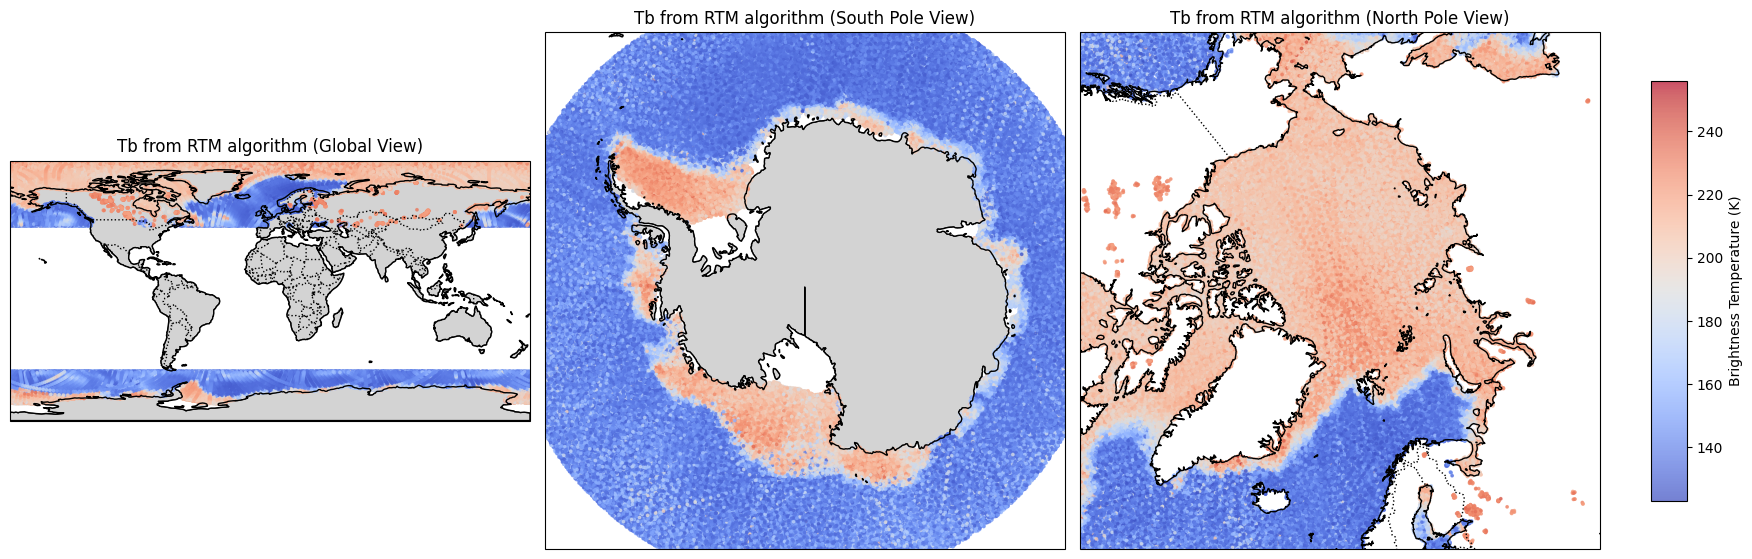

In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

# Create a single figure with three subplots and different projections
fig, axes = plt.subplots(1, 3, figsize=(18, 6),
                         subplot_kw={'projection': ccrs.PlateCarree()})

# Define projections for each subplot
titles = ["Global View", "South Pole View", "North Pole View"]
projections = [ccrs.PlateCarree(), ccrs.SouthPolarStereo(), ccrs.NorthPolarStereo()]
extents = [None, [-180, 180, -90, -60], [-180, 180, 60, 90]]

# Loop through subplots
for i, (ax, title, proj, extent) in enumerate(zip(axes, titles, projections, extents)):
    axes[i] = plt.subplot(1, 3, i + 1, projection=proj)  # Assign correct projection
    axes[i].set_title(f"Tb from RTM algorithm ({title})")
    axes[i].add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    axes[i].add_feature(cfeature.OCEAN, facecolor='white')
    axes[i].add_feature(cfeature.BORDERS, linestyle=':')
    axes[i].add_feature(cfeature.COASTLINE)
    
    # Set extent if defined
    if extent:
        axes[i].set_extent(extent, crs=ccrs.PlateCarree())
    
    # Plot brightness temperature data
    sc = axes[i].scatter(lon, lat, c=Tb22_rtm, cmap='coolwarm', s=3, alpha=0.7, transform=ccrs.PlateCarree())

# Add colorbar to the right side of the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjusted position for colorbar
fig.colorbar(sc, cax=cbar_ax, orientation="vertical", label="Brightness Temperature (K)")
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar
plt.show()


# Corrections

Calculate $T_\text{ref}$

In [7]:
#Regner gennemsnit, for at få en reference RTM værdi
L_int = 0  #Sættes til 0, skal ikke bruge gennemsnit
V_int = 0  #Sættes til 0, skal ikke bruge gennemsnit
W_avg_int = np.mean(W)
cloud_water_avg_int = np.mean(cloud_water)
Ta_avg_int = np.mean(Ta)
Ts_avg_int = np.mean(Ts)
Ti_amsrv_avg_int = np.mean(Ti_amsrv)
Ti_amsrh_avg_int = np.mean(Ti_amsrh)

#Laver det om til arrays igen, med samme længde som theta og c_ice: (Theta og c_ice bliver som de er)
L_arr = np.full_like(c_ice, L_int)
V_arr = np.full_like(c_ice, V_int)
W_avg = np.full_like(c_ice, W_avg_int)
cloud_water_avg = np.full_like(c_ice, cloud_water_avg_int)
Ta_avg = np.full_like(c_ice, Ta_avg_int)
Ts_avg = np.full_like(c_ice, Ts_avg_int)
Ti_amsrv_avg = np.full_like(c_ice, Ti_amsrv_avg_int)
Ti_amsrh_avg = np.full_like(c_ice, Ti_amsrh_avg_int)

#Is emmissitivitet er stadig det samme
e_icev = np.ones(7)*0.9
e_iceh = np.ones(7)*0.8

#Bruger funktionen
Tb_ref_results = []

for i in range(len(lat)):
    Tb_ref = scams(       #Tb_ref er reference simuleringen med gennemsnitsværdier
        V_arr[i], W_avg[i], cloud_water_avg[i], Ta_avg[i], Ts_avg[i], theta[i], 
        np.ones(7)*Ti_amsrv_avg[i], np.ones(7)*Ti_amsrh_avg[i], 
        c_ice[i], e_icev, e_iceh)
    Tb_ref_results.append(Tb_ref)

Tb_ref_results = np.array(Tb_ref_results)

#Læg iskoncentrationen ind


In [8]:
#Load the different channels into arrays
Tb22_rtm_ref = Tb_ref_results[:,0]      #Simulated brightness temperature at 22 GHz
Tb31_rtm_ref = Tb_ref_results[:,1]      #Simulated brightness temperature at 31 GHz
Tb52_rtm_ref = Tb_ref_results[:,2]      #Simulated brightness temperature at GHz

Calculating difference between Tb31_rtm_ref og Tb31_rtm and then adding this delta value to the measured brightness temperature from the satellite. 

In [9]:
delta_rtm = Tb22_rtm_ref - Tb22_rtm
corrected_tb22 = tbch1_measured + delta_rtm

## Plot of correction

/var/folders/9s/16982rgx08x81bt0n7mt6pr80000gn/T/ipykernel_48271/4292891872.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[i] = plt.subplot(1, 3, i + 1, projection=proj)  # Assign correct projection
/var/folders/9s/16982rgx08x81bt0n7mt6pr80000gn/T/ipykernel_48271/4292891872.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[i] = plt.subplot(1, 3, i + 1, projection=proj)  # Assign correct projection
/var/folders/9s/16982rgx08x81bt0n7mt6pr80000gn/T/ipykernel_48271/4292891872.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[i] = plt.subplot(1, 3, i + 1, projection=proj)  # Assign corre

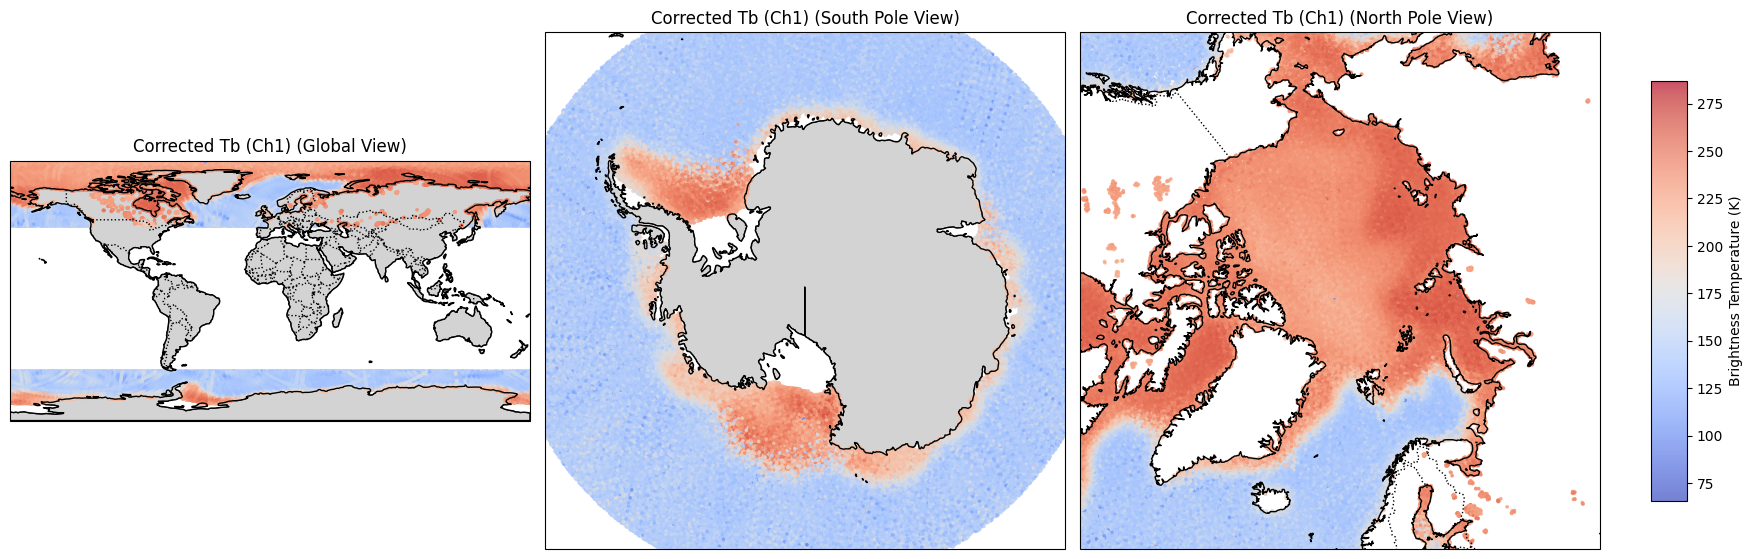

In [10]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

# Create a single figure with three subplots and different projections
fig, axes = plt.subplots(1, 3, figsize=(18, 6),
                         subplot_kw={'projection': ccrs.PlateCarree()})

# Define projections for each subplot
titles = ["Global View", "South Pole View", "North Pole View"]
projections = [ccrs.PlateCarree(), ccrs.SouthPolarStereo(), ccrs.NorthPolarStereo()]
extents = [None, [-180, 180, -90, -60], [-180, 180, 60, 90]]

# Loop through subplots
for i, (ax, title, proj, extent) in enumerate(zip(axes, titles, projections, extents)):
    axes[i] = plt.subplot(1, 3, i + 1, projection=proj)  # Assign correct projection
    axes[i].set_title(f"Corrected Tb (Ch1) ({title})")
    axes[i].add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    axes[i].add_feature(cfeature.OCEAN, facecolor='white')
    axes[i].add_feature(cfeature.BORDERS, linestyle=':')
    axes[i].add_feature(cfeature.COASTLINE)
    
    # Set extent if defined
    if extent:
        axes[i].set_extent(extent, crs=ccrs.PlateCarree())
    
    # Plot brightness temperature data
    sc = axes[i].scatter(lon, lat, c=corrected_tb22, cmap='coolwarm', s=3, alpha=0.7, transform=ccrs.PlateCarree())

# Add colorbar to the right side of the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjusted position for colorbar
fig.colorbar(sc, cax=cbar_ax, orientation="vertical", label="Brightness Temperature (K)")
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar
plt.show()


## Snippet of open water from norwegian sea

In [11]:
# Define the bounding box coordinates
lat_min, lat_max = 67, 71
lon_min, lon_max = 0, 10

# Create a mask for the latitude and longitude within the bounding box
mask = (lat >= lat_min) & (lat <= lat_max) & (lon >= lon_min) & (lon <= lon_max)

#New variables, so that we don't destroy the old ones
lat_norw = lat[mask]
lon_norw = lon[mask]
corrected_tb22_norw = corrected_tb22[mask]
tbch2_measured_norw = tbch2_measured[mask]

# Calculate the standard deviation for each array
std_corrected_tb31 = np.std(corrected_tb22_norw)
std_tbch2 = np.std(tbch2_measured_norw)

# Print the results
print("Standard Deviation of corrected_tb31_norw:", std_corrected_tb31)
print("Standard Deviation of tbch2_norw:", std_tbch2)

Standard Deviation of corrected_tb31_norw: 8.265261776020477
Standard Deviation of tbch2_norw: 28.54452003252143


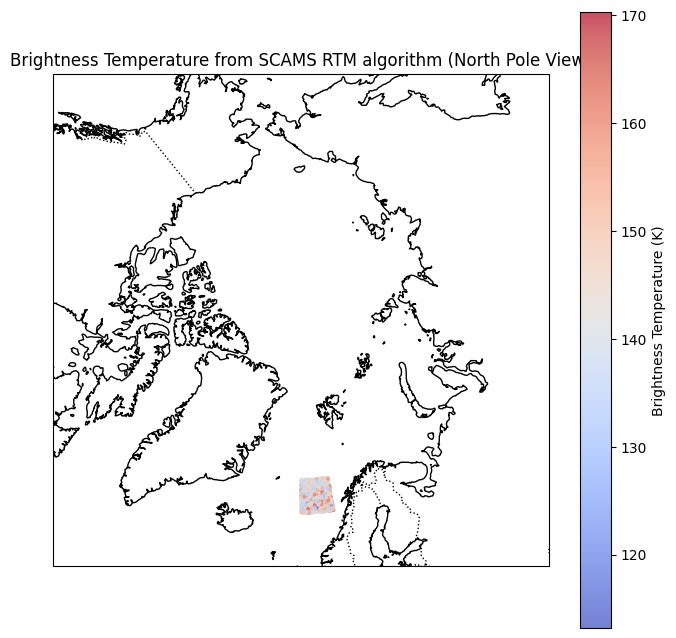

In [12]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

# Create figure with North Polar Stereographic projection
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Set extent to focus on the Arctic region
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Plot brightness temperature data
sc = ax.scatter(lon_norw, lat_norw, c=corrected_tb22_norw, cmap='coolwarm', s=3, alpha=0.7, transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(sc, orientation="vertical", label="Brightness Temperature (K)")

# Add title
plt.title("Brightness Temperature from SCAMS RTM algorithm (North Pole View)")

# Show plot
plt.show()
